In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


## About Dataset

* satisfaction_level	The level of satisfaction of the employee
* last_evaluation	The score of the last evaluation of the employee
* number_project	The number of projects the employee has worked on
* average_montly_hours	The average monthly hours worked by the employee
* time_spend_company	The number of years the employee has spent at the company
* Work_accident	Whether the employee had a work accident (1 = yes, 0 = no)
* left	  Whether the employee has left the company (1 = yes, 0 = no)
* promotion_last_5years	   Whether the employee had a promotion in the last 5 years (1 = yes, 0 = no)
* sales	  The department the employee works in
* salary	The salary level of the employee (low, medium, high)

In [15]:
df.shape

(15004, 11)

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


* There are 15004 non-null values for all the column i.e no null values only 2 columns Salary and age has a 14975 and 3080 non-null values i.e it has missing rows.




<b> Note: </b>

Based on the data types and the feature explanations provided earlier, we identified that 5 columns(Work_accident, left, promotion_last_5years, sales, salary) are categorical in terms of their semantics. so we convert the feature into string data types

In [18]:

df['promotion_last_5years'] = df['promotion_last_5years'].astype(object)
df['Work_accident'] = df['Work_accident'].astype(object)

In [19]:
df.describe(include='object')

,Work_accident,left,promotion_last_5years,Department,salary
count,15004,15004,15004,15004,14975
unique,2,3,2,10,3
top,0,0,0,sales,low
freq,12835,11428,14685,4140,7289


In [20]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,29.000000


## Visulize the categorical and numerical features vs target

In [21]:
continuous_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','age']

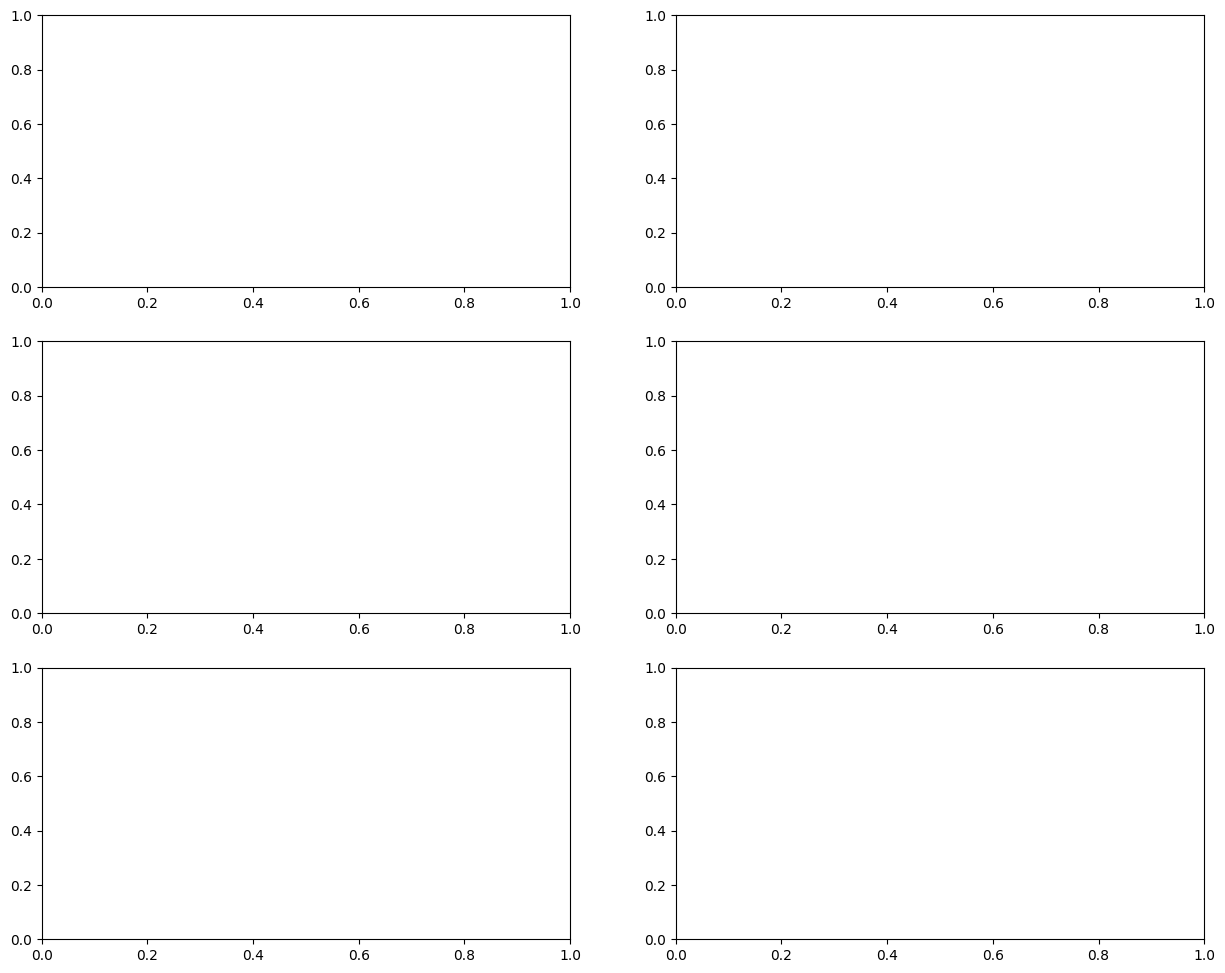

In [22]:
fig, axes = plt.subplots(3,2,figsize=(15,12))


## Missing data handling

## Deletion
* row: if target or label(y) is missing: if entire row is missing we drop the rows.

* Columns: if a column contains > 70% data missing we drop column.


## Imputation(fill in missing value)
 * mean
 * median
 * mode

 Note:

   if the entire row is missing so we drop the rows.


In [23]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

<Axes: >

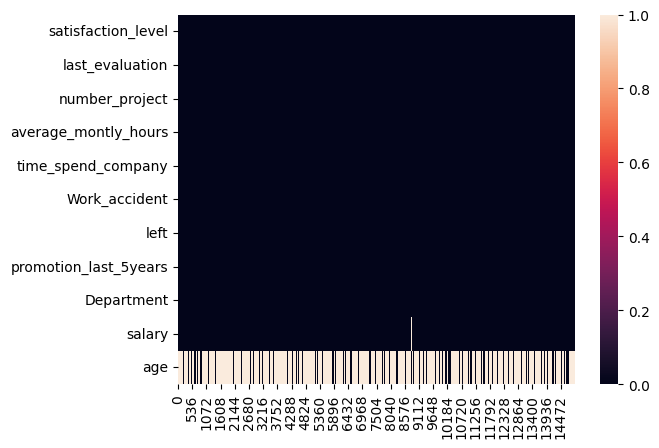

In [24]:
sns.heatmap(df.isna().T)

Employee left the company

* 1 -> yes
* 0 -> No

## Feature selection